# Beta Diversity

## Import Libraries

In [1]:
import os
import pandas as pd
import qiime2 as q2
from skbio import OrdinationResults
from qiime2 import Visualization
from seaborn import scatterplot

%matplotlib inline

In [2]:
data_dir = 'data'
data_dir_div = 'data/beta_diversity'

Rarefaction is done in alpha diversity notebook. Afterwards phylogenetic core metrics are determined there. We now continue working with the beta diversity artefacts. We decided on a sampling depth of 3000.

In [4]:
! qiime diversity core-metrics \
  --i-table $data_dir/closed_reference_cluster/cr90_feature_table.qza \
  --m-metadata-file $data_dir/pundemic_metadata_subgroup_response_all.tsv \
  --p-sampling-depth 3000 \
  --p-n-jobs 8 \
  --output-dir $data_dir_div/core_metrics_results

Saved FeatureTable[Frequency] to: data/beta_diversity/core_metrics_results/rarefied_table.qza
Saved SampleData[AlphaDiversity] to: data/beta_diversity/core_metrics_results/observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: data/beta_diversity/core_metrics_results/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: data/beta_diversity/core_metrics_results/evenness_vector.qza
Saved DistanceMatrix to: data/beta_diversity/core_metrics_results/jaccard_distance_matrix.qza
Saved DistanceMatrix to: data/beta_diversity/core_metrics_results/bray_curtis_distance_matrix.qza
Saved PCoAResults to: data/beta_diversity/core_metrics_results/jaccard_pcoa_results.qza
Saved PCoAResults to: data/beta_diversity/core_metrics_results/bray_curtis_pcoa_results.qza
Saved Visualization to: data/beta_diversity/core_metrics_results/jaccard_emperor.qzv
Saved Visualization to: data/beta_diversity/core_metrics_results/bray_curtis_emperor.qzv


## Beta Diversity Analysis
### PCoA Plots

In [3]:
Visualization.load(f"{data_dir_div}/core_metrics_results/bray_curtis_emperor.qzv")

<visualization: Visualization uuid: 799f0e6c-f53d-49e5-add4-4b89e38157c7>

In [6]:
Visualization.load(f"{data_dir_div}/core_metrics_results/jaccard_emperor.qzv")

<visualization: Visualization uuid: 9913907f-33f3-40a2-8e18-74e92e2db9f3>

In jaccard emperor visualization we see that the donors cluster a bit more than average to one side. There are no other clusters visible for the other categories.

### Significance Analysis of Disease Status

In [8]:
! qiime diversity beta-group-significance \
    --i-distance-matrix $data_dir_div/core_metrics_results/bray_curtis_distance_matrix.qza \
    --m-metadata-file $data_dir/pundemic_metadata_subgroup_response_all.tsv \
    --m-metadata-column disease_status \
    --p-pairwise \
    --o-visualization $data_dir_div/core_metrics_results/bray_curtis-disease_status-significance.qzv

Saved Visualization to: data/beta_diversity/core_metrics_results/bray_curtis-disease_status-significance.qzv


In [9]:
Visualization.load(f"{data_dir_div}/core_metrics_results/bray_curtis-disease_status-significance.qzv")

<visualization: Visualization uuid: d55f2a8a-18da-4d1e-bd35-dab3e650fa8a>

In [10]:
! qiime diversity beta-group-significance \
    --i-distance-matrix $data_dir_div/core_metrics_results/jaccard_distance_matrix.qza \
    --m-metadata-file $data_dir/pundemic_metadata_subgroup_response_all.tsv \
    --m-metadata-column disease_status \
    --p-pairwise \
    --o-visualization $data_dir_div/core_metrics_results/jaccard-disease_status-significance.qzv

Saved Visualization to: data/beta_diversity/core_metrics_results/jaccard-disease_status-significance.qzv


In [11]:
Visualization.load(f"{data_dir_div}/core_metrics_results/jaccard-disease_status-significance.qzv")

<visualization: Visualization uuid: b2b8a9fb-9621-423c-8b0a-c94580a8cea0>

### Significance Analysis of Sexes

In [12]:
! qiime diversity beta-group-significance \
    --i-distance-matrix $data_dir_div/core_metrics_results/bray_curtis_distance_matrix.qza \
    --m-metadata-file $data_dir/pundemic_metadata_subgroup_response_all.tsv \
    --m-metadata-column sex \
    --p-pairwise \
    --o-visualization $data_dir_div/core_metrics_results/bray_curtis-sex-significance.qzv

Saved Visualization to: data/beta_diversity/core_metrics_results/bray_curtis-sex-significance.qzv


In [13]:
Visualization.load(f"{data_dir_div}/core_metrics_results/bray_curtis-sex-significance.qzv")

<visualization: Visualization uuid: 76a7dc89-d677-4929-837d-fba650910de8>

In [14]:
! qiime diversity beta-group-significance \
    --i-distance-matrix $data_dir_div/core_metrics_results/jaccard_distance_matrix.qza \
    --m-metadata-file $data_dir/pundemic_metadata_subgroup_response_all.tsv \
    --m-metadata-column sex \
    --p-pairwise \
    --o-visualization $data_dir_div/core_metrics_results/jaccard-sex-significance.qzv

Saved Visualization to: data/beta_diversity/core_metrics_results/jaccard-sex-significance.qzv


In [15]:
Visualization.load(f"{data_dir_div}/core_metrics_results/jaccard-sex-significance.qzv")

<visualization: Visualization uuid: e64204a6-75b0-45a6-bcaf-ce6741247ab7>

### Significance Analysis of Subgroup Response

In [16]:
! qiime diversity beta-group-significance \
    --i-distance-matrix $data_dir_div/core_metrics_results/bray_curtis_distance_matrix.qza \
    --m-metadata-file $data_dir/pundemic_metadata_subgroup_response_all.tsv \
    --m-metadata-column subgroup_response \
    --p-pairwise \
    --o-visualization $data_dir_div/core_metrics_results/bray_curtis-subgroup_response-significance.qzv

Saved Visualization to: data/beta_diversity/core_metrics_results/bray_curtis-subgroup_response-significance.qzv


In [17]:
Visualization.load(f"{data_dir_div}/core_metrics_results/bray_curtis-subgroup_response-significance.qzv")

<visualization: Visualization uuid: e81472ea-731e-4851-ab0d-4fbae456be19>

In [18]:
! qiime diversity beta-group-significance \
    --i-distance-matrix $data_dir_div/core_metrics_results/jaccard_distance_matrix.qza \
    --m-metadata-file $data_dir/pundemic_metadata_subgroup_response_all.tsv \
    --m-metadata-column subgroup_response \
    --p-pairwise \
    --o-visualization $data_dir_div/core_metrics_results/jaccard-subgroup_response-significance.qzv

Saved Visualization to: data/beta_diversity/core_metrics_results/jaccard-subgroup_response-significance.qzv


In [19]:
Visualization.load(f"{data_dir_div}/core_metrics_results/jaccard-subgroup_response-significance.qzv")

<visualization: Visualization uuid: 23a9e236-e35c-4218-bdfb-342d5119e73a>

### Significance Analysis of Ethnicity

In [46]:
metadata = pd.read_csv(f"{data_dir}/pundemic_metadata_subgroup_response_all.tsv", sep = "\t")
metadata.ethnicity = metadata.ethnicity.replace('Arabic/Middle Eastern', 'Arabic_Middle Eastern')
metadata.to_csv(f'{data_dir}/pundemic_metadata_subgroup_response_all.tsv', sep='\t', index=False)

In [47]:
! qiime diversity beta-group-significance \
    --i-distance-matrix $data_dir_div/core_metrics_results/bray_curtis_distance_matrix.qza \
    --m-metadata-file $data_dir/pundemic_metadata_subgroup_response_all.tsv \
    --m-metadata-column ethnicity \
    --p-pairwise \
    --o-visualization $data_dir_div/core_metrics_results/bray_curtis-ethnicity-significance.qzv

Saved Visualization to: data/beta_diversity/core_metrics_results/bray_curtis-ethnicity-significance.qzv


In [48]:
Visualization.load(f"{data_dir_div}/core_metrics_results/bray_curtis-ethnicity-significance.qzv")

<visualization: Visualization uuid: fa63e36a-eece-479b-8f2c-8b2b38f95709>

In [49]:
! qiime diversity beta-group-significance \
    --i-distance-matrix $data_dir_div/core_metrics_results/jaccard_distance_matrix.qza \
    --m-metadata-file $data_dir/pundemic_metadata_subgroup_response_all.tsv \
    --m-metadata-column ethnicity \
    --p-pairwise \
    --o-visualization $data_dir_div/core_metrics_results/jaccard-ethnicity-significance.qzv

Saved Visualization to: data/beta_diversity/core_metrics_results/jaccard-ethnicity-significance.qzv


In [50]:
Visualization.load(f"{data_dir_div}/core_metrics_results/jaccard-ethnicity-significance.qzv")

<visualization: Visualization uuid: 287e4bf5-1879-495b-bffa-73b768ca84be>

There is no bias for ethnicity and sex in the data.

## Visualizing PCoA Data

In [56]:
pcs = q2.Artifact.load(os.path.join(data_dir_div, 'core_metrics_results/bray_curtis_pcoa_results.qza'))
pcs = pcs.view(OrdinationResults)

pcs_data = pcs.samples.iloc[:,:2]

pcs_data.columns = ['Axis 1', 'Axis 2']

In [57]:
pcs_data.head()

,Axis 1,Axis 2
SRR10505051,0.250298,-0.338638
SRR10505052,0.424126,0.204503
SRR10505053,-0.217905,0.075264
SRR10505056,-0.172541,0.087929
SRR10505057,-0.292707,0.109955


In [60]:
metadata = metadata.set_index('id')

In [61]:
pcs_data_with_md = pd.concat([pcs_data, metadata], axis=1, join='inner')
pcs_data_with_md.head()

,Axis 1,Axis 2,patient_id,age,sex,ethnicity,continent,country,region,city,group,disease_subgroup,blinded_clinical_response,puns_per_hour_pre_treatment,puns_per_hour_post_treatment,time_point,subgroup_response,disease_status
SRR10505051,0.250298,-0.338638,1048,36.0,female,Caucasian,Europe,Switzerland,Zurich,Zurich,Puns,Placebo,NR,9.0,8.0,post-treatment,Placebo_NR,Puns
SRR10505052,0.424126,0.204503,1048,36.0,female,Caucasian,Europe,Switzerland,Zurich,Zurich,Puns,Placebo,NR,9.0,8.0,pre-treatment,Placebo_NR,Puns
SRR10505053,-0.217905,0.075264,1045,29.0,male,Caucasian,Europe,Switzerland,Zurich,Zurich,Puns,Placebo,Res,6.0,0.0,pre-treatment,Placebo_Res,Puns
SRR10505056,-0.172541,0.087929,1044,34.0,male,Indian Subcontinental,Europe,Switzerland,Zurich,Zurich,Puns,Placebo,NaN,4.0,NaN,post-treatment,NaN,Puns
SRR10505057,-0.292707,0.109955,1043,35.0,female,Caucasian,Europe,Switzerland,Zurich,Zurich,Puns,FMT,NR,9.0,6.0,post-treatment,FMT_NR,Puns


<Axes: xlabel='Axis 1', ylabel='Axis 2'>

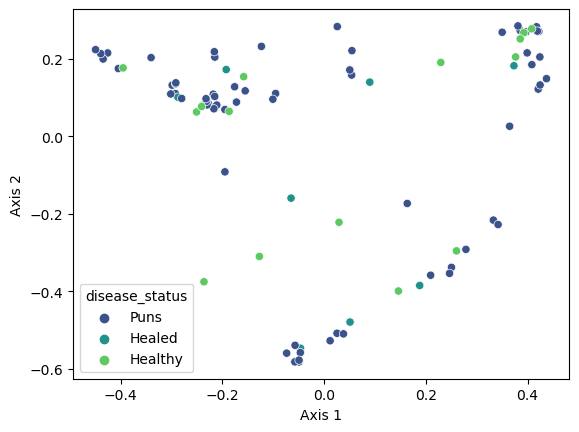

In [62]:
scatterplot(data = pcs_data_with_md,
            x = 'Axis 1',
            y = 'Axis 2',
            hue = 'disease_status',
            palette = 'viridis')

<Axes: xlabel='Axis 1', ylabel='Axis 2'>

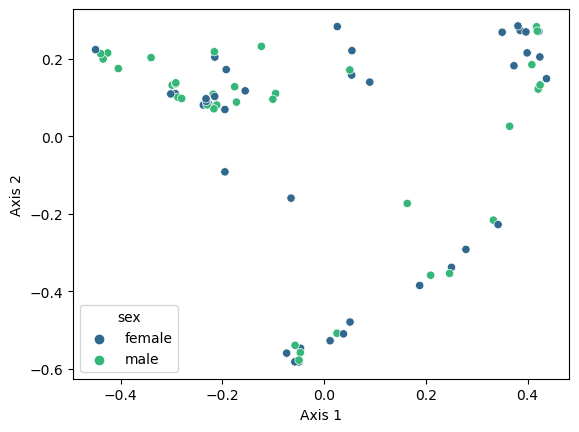

In [64]:
scatterplot(data = pcs_data_with_md,
            x = 'Axis 1',
            y = 'Axis 2',
            hue = 'sex',
            palette = 'viridis')

<Axes: xlabel='Axis 1', ylabel='Axis 2'>

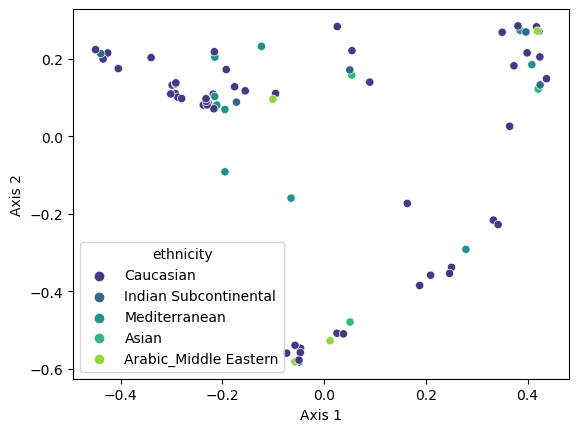

In [65]:
scatterplot(data = pcs_data_with_md,
            x = 'Axis 1',
            y = 'Axis 2',
            hue = 'ethnicity',
            palette = 'viridis')